In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from sklearn.datasets import make_blobs
import random



In [6]:
df = pd.read_csv("/content/drive/MyDrive/ADM_HW4/dataset/archive/Reviews.csv")

df.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


# K-means algorithm

#### K-Means Clustering 
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids c_1, c_2, ..... c_k randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point x_i:
       - find the nearest centroid(c_1, c_2 .. c_k) 
       - assign the point to that cluster 
5. for each cluster j = 1..k
       - new centroid = mean of all points assigned to that cluster
6. End

In [39]:
class KMeans:
    def __init__(self, K, n_features, random_state=None, value_interval=(-10,10)):
        np.random.seed(seed=random_state)
        self.K = K
        self.f = n_features
        self.centroids = np.random.randint(low=value_interval[0], high=value_interval[1], size=(K, n_features))
        
    def fit(self, X, max_iter = 10000):
        X_size = X.shape[0]
        U_old = np.zeros(X_size)
        U = np.zeros(X_size)
        
        for _ in range(max_iter):
            U = self.predict(X)
            
            for j in range(self.K):
                filt = U == j
                if filt.any():
                    self.centroids[j] = np.mean(X[filt], axis=0)
            
            if (U == U_old).all(): # Converge
                break
                

    def predict(self, X):
        res = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            x = X[i]
            min_dist = np.inf
            for j in range(self.K):
                dist = scipy.spatial.distance.euclidean(x, self.centroids[j])
                if dist < min_dist:
                    res[i] = j
                    min_dist = dist
        return res
    
    # def predict_single_value(self, x):
    #     res = 0
    #     min_dist = np.inf
    #     for j in range(self.K)
    #         dist = scipy.spatial.distance.euclidean(x, self.centroids[j])
    #         if dist < min_dist:
    #             res = j
    #             min_dist = dist
    #     return res

In [49]:
K = 10
n_samples = 1000
n_features = 2
n_clusters = K
random_state = 42
max_iter = 500
value_interval=(-10,10)

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

kMeans = KMeans(K, n_features)


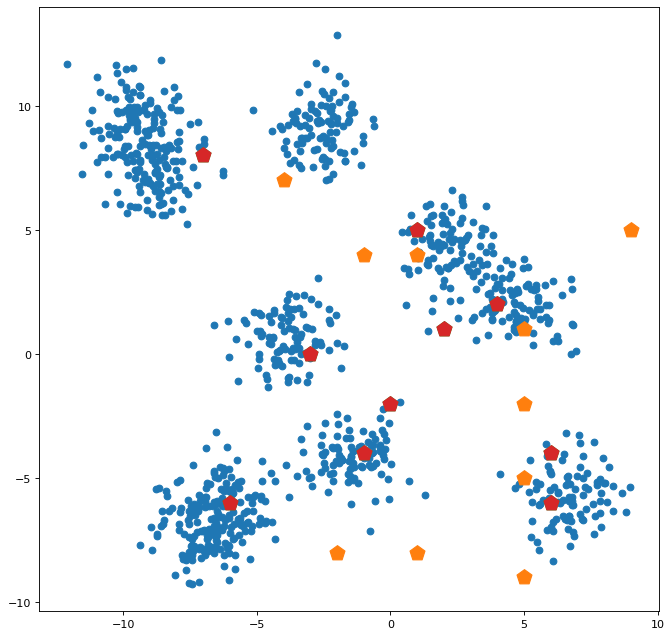

In [50]:
fig=plt.figure(figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kMeans.centroids[:, 0], kMeans.centroids[:, 1], s=200, marker='p')

kMeans.fit(X, max_iter=50)

plt.scatter(kMeans.centroids[:, 0], kMeans.centroids[:, 1], s=200, marker='p')

kMeans.fit(X, max_iter=450)

#plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kMeans.centroids[:, 0], kMeans.centroids[:, 1], s=200, marker='p');


#### Choose the number of clusters(K) and obtain the data points 


To initially choose the number of clusters we are going to go random.

In [29]:
K = random.randint(2,10)
K

5

We are now going to make a plot of random data in order to have some viz. of what I am doing

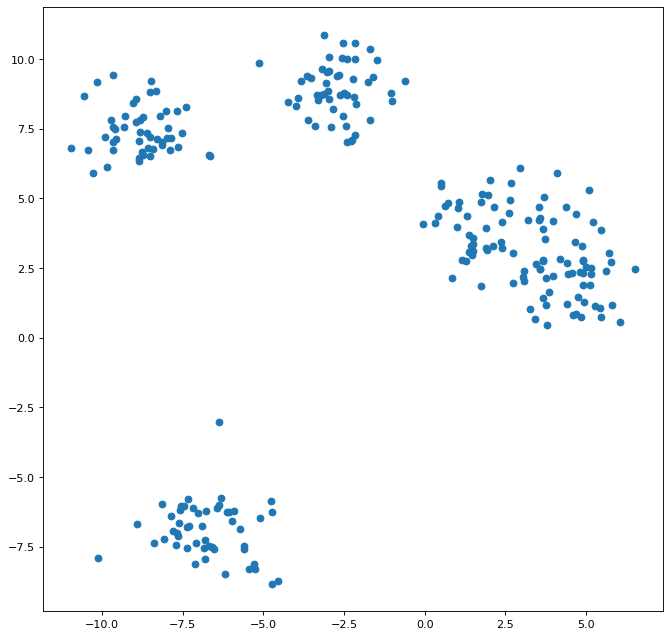

In [56]:
from sklearn.datasets import make_blobs

n_samples = 250
n_features = 2
n_clusters = K
random_state = 42
max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

fig=plt.figure(figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

and we are going to initialise one centroid for each cluster.

In [35]:
initialize_centroids = random.sample(range(0, len(df)), K)
initialize_centroids

[354494, 484154, 223482, 318708, 383558]

In [67]:
centroids = []
for i in initialize_centroids:
    centroids.append([random.randint(-7,10),random.randint(-10,5)]) # how to automatise the values in here

centroids = np.array(centroids)

centroids

array([[ 7, -2],
       [ 3, -9],
       [-2,  5],
       [ 9, -7],
       [-1,  0]])

# Place the centroids

Going to add the centroids in the scatter we had

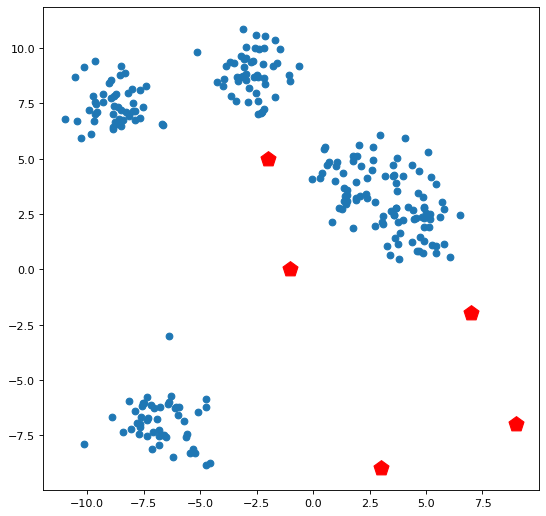

In [68]:
fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

for x,y in centroids:
  plt.scatter(x, y, s=200, c='red',marker='p')

# Dato che questo non mi torna perchè i centroidi dovrebbero almeno essere vicini ai puntini dati....

In [80]:
# occhio che questo è totalmente copiato


# creating an empty centroid array
centroids=np.array([]).reshape(X.shape[1],0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,X.shape[0] -1)]]

centroids

array([[-7.19489644, -7.86113584,  2.35461425, -2.41743685, -8.85057453],
       [-6.12114037, -6.41800612,  3.41296502,  7.02671721,  6.42626854]])

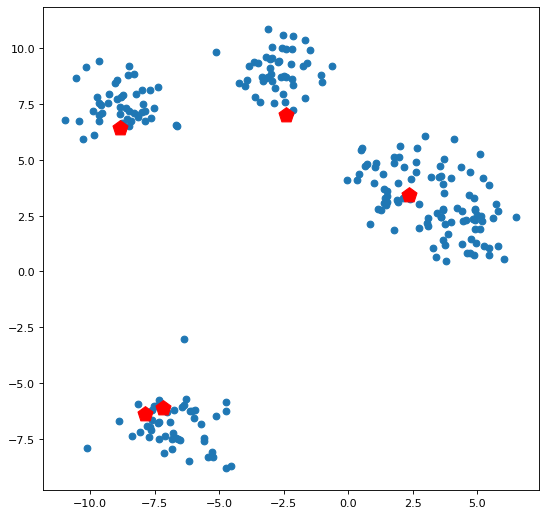

In [96]:
fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);

centroids[0][0]

for i in range(K):
  x = centroids[0][i]
  y = centroids[1][i]
  plt.scatter(x, y, s=200, c='red',marker='p')